<a href="https://colab.research.google.com/github/iamu985/LinearRegression_-multivariate-/blob/master/Housing_pricesLinearRegression(multivariate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sb
sb.set(style='darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Brief Summary on the Mathematical Approaches:


> Here I list all the formulaes and concepts that I use in my humble approach to apply Multi-variate Linear Regression model from scratch to a dataset of housing prices.
 



###Feature Scaling:

$$\text{Feature scale} = \frac{x_{i} - \bar{x}}{S}$$

where $$S = max_{x} - min_{x}$$ and  $\bar{x}$ is the mean.

I have used feature scaling in my dataset to kind of normalize the values and bring it down to comparable ranges such that it is easier see the relationship between the attributes. The main objective of feature scaling is to bring down values of the dataset to a similar range of -1 to 1 or values closer to 1 such as -0.5 to 1 or -3 to 3.

###Cost Function or Mean Squared Error
$$\text{J}(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_{\theta}(X) - y)^2$$

where, m = no. of samples and n = no. of features. X is the matrix of input values from our dataset of shape (m x n) and y is our output vector of shape (m x 1).

also, $h_{\theta}(X)$ is our hypothesis or in other words our predicted values. And it is calculated as follows:

$$h_{\theta}(X) = \theta_{0}X_{0} + \theta_{1}X_{1} + \theta_2X_{2}+...+\theta_{n}X_{n}$$

which can easily be written as 
$$h_{\theta}(X) = \theta^TX$$

where X is a matrix and $\theta^{T}$ is a transposed vector of all $\theta's$.





But in this case I have transformed the original formula for my hypotheis i.e. $h_{\theta}(X) = \theta^{T}X$ and instead I have used $h_{\theta}(X)=X\theta$.
The reason being that X is a $(m \times n)$ matrix in my case. I have chosen this shape of matrix rather than $(n \times m)$ for X. $\theta$ is $(n \times 1)$ vector whose dot product will give me $(m \times 1)$ vector which is the desired result in this case.

If we were to use the transpose formula I would have gotten my dimensions wrong for $\theta^{T}$ is $(1 \times n)$ and the dot product would be between $(1 \times n)$ and  $(m \times n)$ which would give me a dimension error.To solve this problem in this case I should have to transpose both $\theta$ and $X$ giving me $(1 \times m)$ as my hypothesis. To be able to use this result in my program I would then again have to transpose the hypothesis.  

So, in order to avoid such path, I decided to go with the easiest one simply going for dot product between $X$ and $\theta$.

###Batch Gradient Descent
Here comes the important part of the project. Updating the $\theta's$ in order to find the best fit model for our dataset.

Batch gradient descent is given by:

$$\theta_{j} :=  \theta_{j} - \alpha \frac{\partial}{\partial \theta}(J(\theta)) $$

where $\alpha$ is the learning rate and $J(\theta)$ is our cost function.

If we include the formula of the cost function we will get:

$$\theta_{j} := \theta_{j} - \alpha \frac{\partial}{\partial\theta} (h_{\theta}(X) - y)^2$$




Solving for the partial derivative we get the following equation.

$for \; j=0:$
$$\theta_{0} := \theta_{0} - \alpha \frac{1}{m}\sum_{i=1}^m(h_{\theta}(X)-y) X_{0}$$
$\text{where}\; X_{0}$ is a vector of ones.

$for\; j=1:$
$$\theta_{1} := \theta_{1} - \alpha \frac{1}{m}\sum_{i=1}^m (h_{\theta}(X)-y)X_{1}$$

So the general form is

$for\; j = n:$
$$\theta_{n} := \theta_{n} - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(X) - y) X_{n}$$



So the main function of gradient descent is to find the optimal values for $\theta's$ so that the cost function $J(\theta)$ is minimized.

The partial derivatives wrt $\theta$ gives us the information on the slope of the cost function plot. So, when the values reach the global minimum following the number of iterations the slope will be 0 which means the value of partial derivatives will be 0. In such case the value  of $\theta$ remains unchanged. Thus no matter how much we iterate the program through we will be receiving the same value for $\theta's$ if it has reached the global minimum keeping the value of $\alpha$ in mind. 

###Vectorization of Batch Gradient Descent

In order to make the process of computation fast and efficient I have vectorized the operations performed in gradient descent in other words I have used linear algebra computation instead of slicing and indexing the arrays and vectors or dataframes.

For example: 

In [0]:
    #calculating theta change
    error =  h - y
    theta_change =  float(alpha) * const * (np.dot(X.transpose(), error))


In the above code snippet error is this part of the formula $(h_{\theta}(X) - y)$ where I calculate the difference between the predicted values and the actual output values.

theta_change is calculating $\alpha \frac{1}{m}\times (X^{T} \times error)$.

Here the dimension of error is $(m \times 1)$ and the dimension of X is $(m \times n)$ so transposing X will give me a dimension that is $(n \times m)$. 

The dot product between $(n \times m)$ and $(m \times 1)$ will give me the result with $(n \times 1)$ dimension which is my $\theta$'s dimension.

###The Fun Stuff- Multi-variate Linear Regression from scratch
Note: The dataset used in this project is taken from coursera.org, Andrew Ng's, Machine Learning course.

In [0]:
#defining functions
def feature_scale(data):
  mean = float(data.mean())
  scale = float(max(data) - min(data))
  scaled_list = []
  for i in range(len(data)):
    featured_i = float((data[i] - mean) / scale)
    scaled_list.append(featured_i)
  scaled_array = np.array(scaled_list).reshape(len(data), 1)
  return scaled_array

def costFunction(X, y, params):
  '''Computing cost and hypothesis'''
  h = np.dot(X, params)
  error = float(sum((h-y)**2))
  const = float(1/(2*len(y)))
  cost = float(const * error)
  return cost

def accuracy_score(X, y, params):
  '''calculating the accuracy score of the params'''
  h = np.dot(X, params)
  error = (h - y) ** 2
  score =  100 - (error.mean()*100)
  return score

def batch_gradient(X, y, params, alpha=0.001, iterations=15):
  '''Computing for batch gradient descent'''
  m = len(y)
  const = float(1/m)
  parameters = np.array(params, dtype='float').reshape(len(params), 1)
  iters = 0
  J_list, params_list = [], []
  while iters < iterations:

    #calling hypothesis and costfunction
    h = np.dot(X, parameters)
    J = costFunction(X, y, parameters)
    J_list.append(J)
    
    #calculating theta change
    error =  h - y
    theta_change =  float(alpha) * const * (np.dot(X.transpose(), error))

    #updating theta
    parameters = parameters - theta_change

    #checking for accuracy score
    
    iters += 1
    #print(f'iters: {iters}, J: {J}, t1: {parameters[0]}, t2: {parameters[1]}, t3: {parameters[2]}, accuracy: {a_score}')
  a_score = accuracy_score(X, y, parameters)
  return parameters, J_list, a_score, params_list

def loop(X, y, init_params):
  active = True
  c = 0
  while active:
    alpha = float(input('Alpha: '))
    iterations = int(input('Iterations: '))
    cont = input('Continue: ')
    if cont == 'n':
      active = False
    
    if cont == 'y':
      active = True
      c += 1

    else:
      print('wrong command')
      active = False
    
    thetas, costs, acc_check, thetas_list = batch_gradient(X, y, init_params, alpha, iterations)
    print('Computing Done\n')
    print('=' * 30, 'Summary', '=' * 30)
    print(f'\t\ntheta1: {thetas[0]}, \ntheta2: {thetas[1]}, \ntheta3: {thetas[2]}, \naccuracy: {acc_check}, \nCost: {costs[-1]}')
    print('*' * 67 )
    cont = input('Continue: ')
    if cont == 'n':
      active = False
    if cont == 'y':
      continue
    else:
      active = False

In [7]:
#loading datasets
filename = '/content/housing_prices.csv'
df = pd.read_csv(filename)
df.head()

,size in ft.sq,no. of bedrooms,prices
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


Our dataset consists of 3 attributes among of which the first 2 are our labels or features and the last 'prices' is our output value.

In [0]:
cols = df.columns
X1_unfeatured = df[cols[0]]
X2_unfeatured = df[cols[1]]
y_unfeatured = df[cols[2]]

Text(0.5, 1.0, 'Number of bedrooms vs prices(unf)')

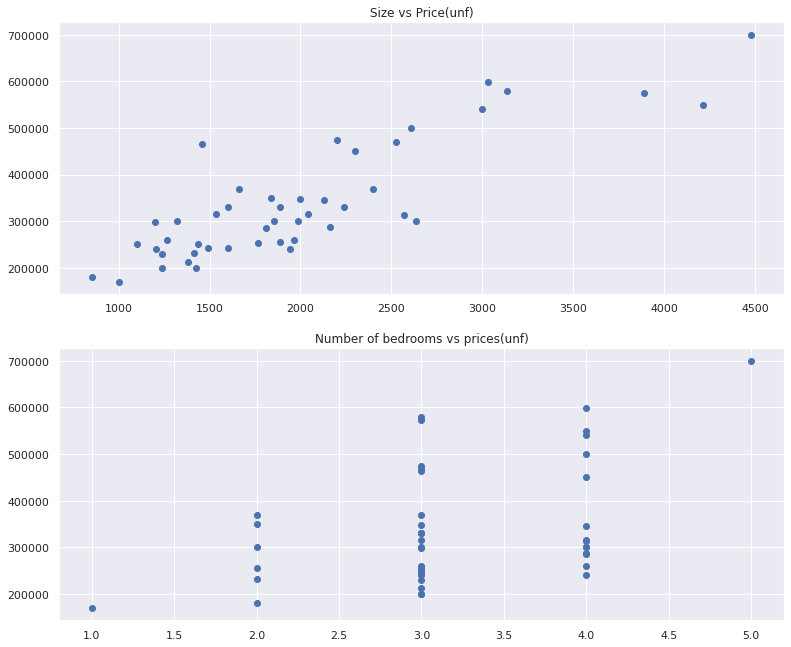

In [9]:
#plotting the unfeatured datasets
fig, axs = plt.subplots(2, figsize=(13, 11))
axs[0].scatter(X1_unfeatured, y_unfeatured)
axs[0].set_title('Size vs Price(unf)')
axs[1].scatter(X2_unfeatured, y_unfeatured)
axs[1].set_title('Number of bedrooms vs prices(unf)')

That is how our unfeatured dataset looks like at the moment. Note (unf) is abbreviation of unfeatured. Now lets get our features scaled using feature_scale function from above.

In [0]:
X1_scaled = feature_scale(df[cols[0]])
X2_scaled = feature_scale(df[cols[1]])
y_scaled = feature_scale(df[cols[2]])

In [0]:
df['scaled_size'] = X1_scaled
df['scaled_rooms'] = X2_scaled
df['scaled_prices'] = y_scaled

In [12]:
df.head()

,size in ft.sq,no. of bedrooms,prices,scaled_size,scaled_rooms,scaled_prices
0,1600,3,329900,-0.109883,-0.043478,-0.017395
1,2400,3,369000,0.110746,-0.043478,0.056378
2,1416,2,232000,-0.160627,-0.293478,-0.202112
3,3000,4,539900,0.276218,0.206522,0.378831
4,1985,4,299900,-0.003705,0.206522,-0.073999


In [0]:
m = len(df)
ones = np.zeros((m,1))

In [0]:
df['ones'] = ones

In [15]:
df.head()

,size in ft.sq,no. of bedrooms,prices,scaled_size,scaled_rooms,scaled_prices,ones
0,1600,3,329900,-0.109883,-0.043478,-0.017395,0.0
1,2400,3,369000,0.110746,-0.043478,0.056378,0.0
2,1416,2,232000,-0.160627,-0.293478,-0.202112,0.0
3,3000,4,539900,0.276218,0.206522,0.378831,0.0
4,1985,4,299900,-0.003705,0.206522,-0.073999,0.0


In [0]:
colms = df.columns
data = df[[colms[6], colms[3], colms[4], colms[5]]]

In [17]:
data.head()

,ones,scaled_size,scaled_rooms,scaled_prices
0,0.0,-0.109883,-0.043478,-0.017395
1,0.0,0.110746,-0.043478,0.056378
2,0.0,-0.160627,-0.293478,-0.202112
3,0.0,0.276218,0.206522,0.378831
4,0.0,-0.003705,0.206522,-0.073999


In [0]:
X1_featured = data[colms[3]]
X2_featured = data[colms[4]]
y_featured = data[colms[5]]

Text(0.5, 1.0, 'Number of bedrooms vs prices(fea)')

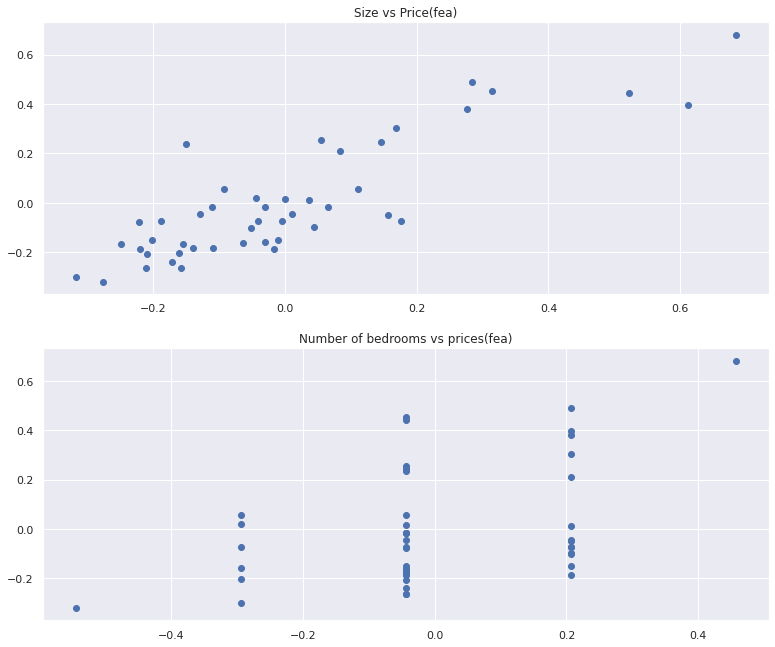

In [19]:
#plotting the unfeatured datasets
fig, axs = plt.subplots(2, figsize=(13, 11))
axs[0].scatter(X1_featured, y_featured)
axs[0].set_title('Size vs Price(fea)')
axs[1].scatter(X2_featured, y_featured)
axs[1].set_title('Number of bedrooms vs prices(fea)')

Now that's what I'm talking about. Now in graph we won't be noticing any difference but in the process of calculation we just saved ourselves from a huge bunch of trouble! I have not shown here but without feature scaling our attributes, our model will have abnormal values for cost function and parameters. If you don't beleive me you can try it out for yourselves. Go ahead and define X arrays consisting of ones feature, size feature and bedroom feature i.e unfeatured attributes, and do the same for y and params values and plug it into the function for accuracy score and costfunction above.Then you will understand why I used 'abnormal value' to describe it.

In [0]:
features = data.columns
n = len(features) - 1

In [0]:
X_data = data[[features[0], features[1], features[2]]]
y_data = data[features[3]]
params = np.zeros((n, 1))

In [0]:
X = np.array(X_data).reshape(m, n)
y = np.array(y_data).reshape(m, 1)

In [23]:
c = costFunction(X, y, params)
a = accuracy_score(X, y, params)
print(f'costfunction={c}, accuracy score: {a}')

costfunction=0.027690236568537974, accuracy score: 94.4619526862924


Costfunction and accuray at the moment is quite interesting. Let's see if we can find the optimum highest accuracy that is closer to 100% and value of costfunction closer to 0.

In [24]:
loop(X, y, params)

Alpha: 0.01
Iterations: 1500
Continue: y
Computing Done

============================== Summary ==============================
	
theta1: [0.], 
theta2: [0.4451673], 
theta3: [0.15722041], 
accuracy: 97.65107575819701, 
Cost: 0.011748417219163507
*******************************************************************
Continue: y
Alpha: 0.01
Iterations: 2500
Continue: y
Computing Done

============================== Summary ==============================
	
theta1: [0.], 
theta2: [0.59458675], 
theta3: [0.17292949], 
accuracy: 98.11456126283686, 
Cost: 0.00942852801756263
*******************************************************************
Continue: y
Alpha: 0.01
Iterations: 5000
Continue: y
Computing Done

============================== Summary ==============================
	
theta1: [0.], 
theta2: [0.77090089], 
theta3: [0.12528371], 
accuracy: 98.4053407539236, 
Cost: 0.007973539394472023
*******************************************************************
Continue: y
Alpha: 0.01
Iterations

So from the loop trials we can conclude that we can get our best fit model with accuracy 98.52% and cost function 0.0074 if the learning rate is 0.01 and it is iterated over 12000 times.

In [0]:
p, mse, a, p_list = batch_gradient(X, y, params, 0.01, 12000)

Text(0, 0.5, 'Iterations')

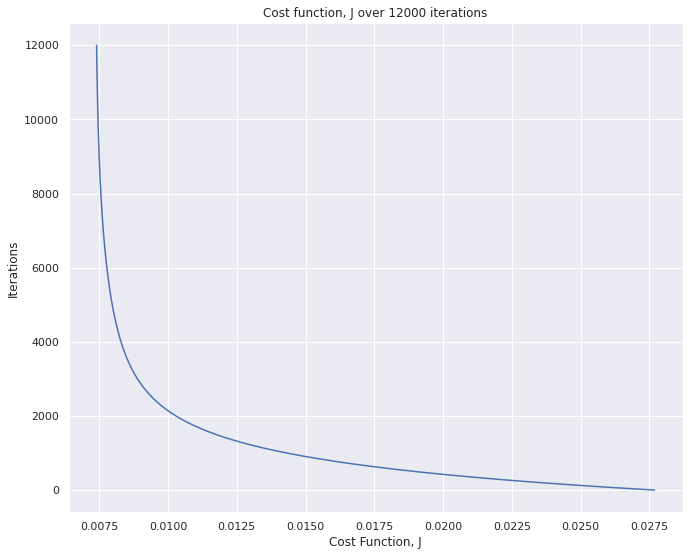

In [26]:
fig, axs = plt.subplots(figsize=(11, 9))
plt.plot(mse, [i for i in range(12000)])
plt.title('Cost function, J over 12000 iterations')
plt.xlabel('Cost Function, J')
plt.ylabel('Iterations')

The graph of the change in cost function with every iteration.

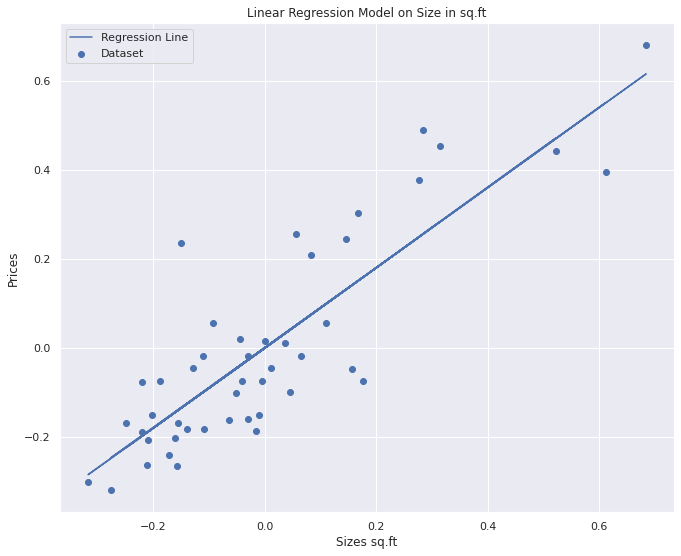

In [27]:
h = np.dot(X, p)
fig, ax = plt.subplots(figsize=(11, 9))
plt.scatter(X1_scaled, y_scaled, label='Dataset')
plt.plot(X1_scaled, h, label='Regression Line')
plt.title('Linear Regression Model on Size in sq.ft')
plt.xlabel('Sizes sq.ft')
plt.ylabel('Prices')
plt.legend()

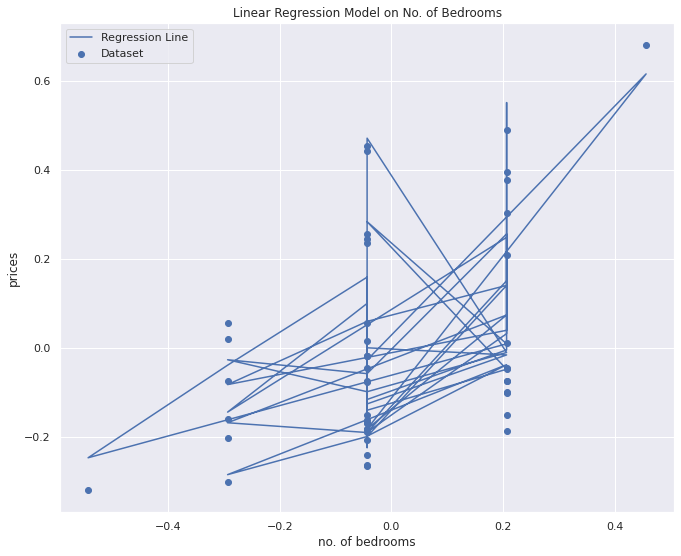

In [28]:
h = np.dot(X, p)
fig, ax = plt.subplots(figsize=(11, 9))
plt.scatter(X2_scaled, y_scaled, label='Dataset')
plt.plot(X2_scaled, h, label='Regression Line')
plt.title('Linear Regression Model on No. of Bedrooms')
plt.xlabel('no. of bedrooms')
plt.ylabel('prices')
plt.legend()

In [31]:
print(f'accuracy: {a}, costfunction: {mse[-1]}')

accuracy: 98.51905245574926, costfunction: 0.0074047549841619814


Conclusion: In this project I have tried to fit, test and train the Linear Regression Model on a dataset of Housing Prices to predict the prices of a house based on its size in feet squared and number of bedrooms. This model can predict the price with an accuracy of 98.52%.

Thus my first hand on applying Multi-variate Linear Regression from scratch is complete with success.